## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [188]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

## Exploratory data analysis

In [189]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## observe the different feature type present in the data



In [190]:
#Checking ROws and Columns
df.shape

(284807, 31)

#### Data set has 284807 rows and 31 columns

In [191]:
# Checking Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

####  All columns are numeric 

In [192]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [193]:
# Checking NULL Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### IT is good that no null values in the data set.

In [194]:
# Checking columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here we will observe the distribution of our classes

In [195]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Normal_share :",normal_share);
print("Fraud_share :",fraud_share);

Normal_share : 99.82725143693798
Fraud_share : 0.1727485630620034


##### From Above code we can understand that  99.82% in the data set contains no fraud data that is normal share.
##### Only 0.17% in the data set is treated as fraud data

Text(0.5, 1.0, 'Bar plot for the number and percentage of fraudulent vs non-fraudulent')

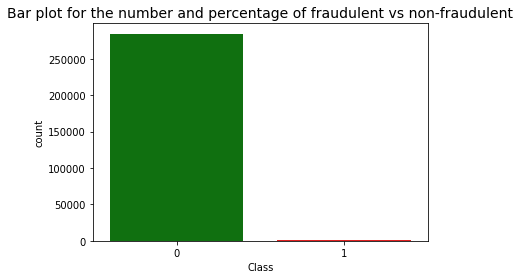

In [196]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
import seaborn as sns
Colours=['g','r']
sns.countplot('Class', data=df, palette=Colours)
plt.title('Bar plot for the number and percentage of fraudulent vs non-fraudulent', fontsize=14)

#### 0  indicates  Non-Fraudulent
#### 1 indicates Fraudulent
#### So we can see that data set is highly imbalanced between Non-Fraudulent and Fraudulent data

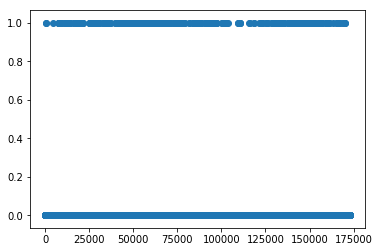

In [197]:
# Create a scatter plot to observe the distribution of classes with time

plt.scatter(df.Time,df.Class)
plt.show()


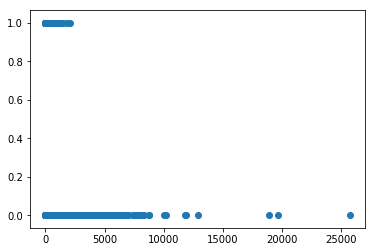

In [198]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Amount,df.Class)
plt.show()


# Drop unnecessary columns
Here 28 columns are Transformed using PCA for security reasons.So it is difficult to make assumption about unnecessary columns.we decided that do not drop the columns and feed all of them in to model and let the model decide  which feature should exists or not


### Splitting the data into train & test data

In [199]:
x=df.drop("Class",axis=1)
y=df.Class #class variable

In [200]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 4, stratify = y)

In [201]:
#print shapes of train and test sets
X_train.shape


(213605, 30)

In [202]:
# print shapes of train and test sets
X_test.shape

(71202, 30)

In [203]:
# print shapes of train and test sets
y_train.shape


(213605,)

In [204]:
# print shapes of train and test sets
y_test.shape

(71202,)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [205]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


### Plotting the distribution of a variable

In [206]:
#Checking Skewness of all columns.
#For normally distributed data, the skewness should be about zero
#a skewness value greater than zero means that there is more weight in the right tail of the distribution. 
from scipy.stats import skew
skew(df, axis=1, bias=True, nan_policy='propagate')

array([5.28880051, 2.1569084 , 5.29233445, ..., 5.29465008, 5.29465136,
       5.29463801])

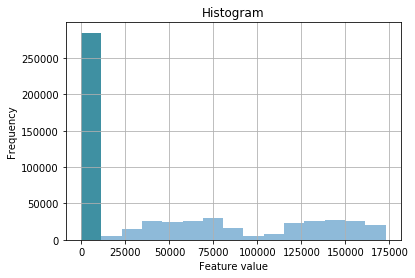

In [207]:
# plot the histogram of a variable from the dataset to see the skewness
df.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

In [208]:
## Skewness exists in right tail ..That means more weight in the right tail of the distribution. 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [209]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
#preprocessing.PowerTransformer(df,method='yeo-johnson', standardize=True, copy=False)
pt = PowerTransformer(copy=False)
X_train=pt.fit_transform(X_train)
X_train


array([[ 1.36368005, -1.09405765, -0.77707764, ...,  0.54867031,
         0.46696081,  1.0871737 ],
       [ 1.52598286, -0.03665817,  0.69930236, ...,  0.4714118 ,
         0.95915142, -0.19107802],
       [ 0.40747956, -0.56813152, -0.31412177, ...,  0.01983333,
         0.15313608, -0.19606017],
       ...,
       [ 1.38376912, -1.14390352, -1.67191402, ...,  0.04860193,
         0.65175698,  0.7673976 ],
       [ 0.27178728, -0.73662436,  0.19813169, ..., -0.45317086,
        -0.55802389, -1.24032163],
       [-0.98584285, -0.83269512, -0.11415457, ..., -0.4324947 ,
         0.26444543,  1.49068557]])

In [210]:

X_test = pt.transform(X_test)
X_test

array([[ 0.33122625,  1.20181348, -0.5891964 , ...,  0.21249609,
        -0.09285891, -1.53780112],
       [ 1.45098664, -1.13957847,  0.42425898, ...,  0.45705365,
         0.16658161,  0.34816964],
       [ 1.12260505, -0.59420318, -0.18246195, ..., -0.32274256,
        -0.13523149,  1.09664933],
       ...,
       [ 0.8781395 , -1.10305634, -0.66196251, ...,  0.31861597,
         0.51357019,  1.72093891],
       [-0.71298999,  0.46644844, -0.91846466, ..., -0.13808763,
         0.04549527,  1.39352142],
       [ 0.65404676,  1.50410215, -0.0625646 , ..., -0.24236853,
        -0.23296202, -0.12542517]])

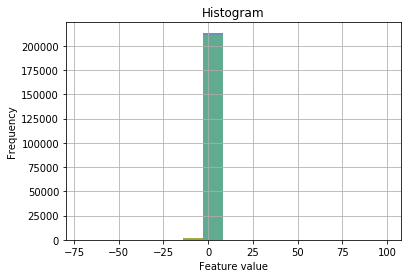

In [211]:
# plot the histogram of a variable from the dataset again to see the result 
df1 = pd.DataFrame(X_train)
df1.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.

# Plot a line of the fitted distribution over the top

plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

###### The Histogram looks like good and more gaussian 

In [212]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit_transform(df[['Amount','Time']])

array([[ 0.24496426, -1.99658302],
       [-0.34247454, -1.99658302],
       [ 1.16068593, -1.99656197],
       ...,
       [-0.0818393 ,  1.6419735 ],
       [-0.31324853,  1.6419735 ],
       [ 0.51435531,  1.64205773]])

## Model Building on the imbalanced dataset
- Build different models on the imbalanced dataset and see the result

#### 1.Logistic Regression

In [213]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C =  np.logspace(-4, 4, 50)  #--> list of values
cv_num =num_C   #--> list of values
print(num_C)

[1.00000000e-04 1.45634848e-04 2.12095089e-04 3.08884360e-04
 4.49843267e-04 6.55128557e-04 9.54095476e-04 1.38949549e-03
 2.02358965e-03 2.94705170e-03 4.29193426e-03 6.25055193e-03
 9.10298178e-03 1.32571137e-02 1.93069773e-02 2.81176870e-02
 4.09491506e-02 5.96362332e-02 8.68511374e-02 1.26485522e-01
 1.84206997e-01 2.68269580e-01 3.90693994e-01 5.68986603e-01
 8.28642773e-01 1.20679264e+00 1.75751062e+00 2.55954792e+00
 3.72759372e+00 5.42867544e+00 7.90604321e+00 1.15139540e+01
 1.67683294e+01 2.44205309e+01 3.55648031e+01 5.17947468e+01
 7.54312006e+01 1.09854114e+02 1.59985872e+02 2.32995181e+02
 3.39322177e+02 4.94171336e+02 7.19685673e+02 1.04811313e+03
 1.52641797e+03 2.22299648e+03 3.23745754e+03 4.71486636e+03
 6.86648845e+03 1.00000000e+04]


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [214]:
#perform cross validation.
#here we are using StratifiedKFold validation
from sklearn.model_selection import StratifiedKFold 
x=X_train
y=y_train
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x,y)
print(skf)


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [215]:
#perfom cross validation on the X_train & y_train
for train_index, test_index in skf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv= x[train_index], x[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

TRAIN: [ 42719  42720  42721 ... 213602 213603 213604] TEST: [    0     1     2 ... 42967 44006 44559]
TRAIN: [     0      1      2 ... 213602 213603 213604] TEST: [42719 42720 42721 ... 88287 88494 88505]
TRAIN: [     0      1      2 ... 213602 213603 213604] TEST: [ 85438  85439  85440 ... 128164 128165 128166]
TRAIN: [     0      1      2 ... 213602 213603 213604] TEST: [126928 127080 127687 ... 171746 172150 172213]
TRAIN: [     0      1      2 ... 171746 172150 172213] TEST: [170880 170881 170882 ... 213602 213603 213604]


##### Hyper Parameter Tunning


In [216]:
#Hyper Parameter Tunning

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
logistic = linear_model.LogisticRegression()
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)
# Create a list of options for the regularization penalty
#penalty = ['l1', 'l2']

params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
                 

In [217]:
# fit model with best Params
clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                                 

In [218]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ", clf.best_params_)

Best AUC:  0.9800766800568095
Best hyperparameters:  {'logistic__C': 0.009102981779915217, 'logistic__penalty': 'l2'}


In [219]:
# predict  on test data

from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred = clf.predict(X_test)
# check area under curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC of test data:    	 0.98


In [220]:
# cross validation results
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.071639,0.105512,0.021902,0.002281,0.0001,l1,"{'logistic__C': 0.0001, 'logistic__penalty': '...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,96
1,1.232585,0.053183,0.034591,0.002722,0.0001,l2,"{'logistic__C': 0.0001, 'logistic__penalty': '...",0.938569,0.955992,0.923399,0.959528,0.939764,0.943450,0.013079,91
2,1.014032,0.019535,0.021822,0.005566,0.000145635,l1,"{'logistic__C': 0.00014563484775012445, 'logis...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,96
3,1.367666,0.062342,0.048873,0.011284,0.000145635,l2,"{'logistic__C': 0.00014563484775012445, 'logis...",0.949483,0.962790,0.945757,0.967712,0.953045,0.955757,0.008235,88
4,1.150499,0.041842,0.023615,0.002678,0.000212095,l1,"{'logistic__C': 0.00021209508879201905, 'logis...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,96
5,1.527690,0.044906,0.043085,0.007872,0.000212095,l2,"{'logistic__C': 0.00021209508879201905, 'logis...",0.955810,0.967489,0.962917,0.976736,0.957551,0.964101,0.007539,86
6,1.206593,0.041277,0.026985,0.007825,0.000308884,l1,"{'logistic__C': 0.00030888435964774815, 'logis...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,96
7,1.574906,0.061324,0.044962,0.005213,0.000308884,l2,"{'logistic__C': 0.00030888435964774815, 'logis...",0.958557,0.971019,0.971460,0.979753,0.960127,0.968183,0.007877,84
8,1.220359,0.035610,0.021537,0.001847,0.000449843,l1,"{'logistic__C': 0.0004498432668969444, 'logist...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,96
9,1.498864,0.014113,0.040789,0.002609,0.000449843,l2,"{'logistic__C': 0.0004498432668969444, 'logist...",0.960077,0.973816,0.977599,0.981605,0.962719,0.971163,0.008387,83


#####  Applying SMOTE Technique on Logistic Regression

In [229]:
# for "imblearn package" installing use pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smt.fit_sample(X_train, y_train)


In [223]:
X_train_balanced.shape

(426472, 30)

In [224]:
y_train_balanced.shape

(426472,)

In [225]:
#Checking imbalance rate
churn_rate = (y_train_balanced == 1).sum()/(y_train_balanced == 0).sum()
print("Imbalance in The Data : ",churn_rate)

Imbalance in The Data :  1.0


##### Logistic Regression with balanced data

In [226]:
from sklearn import linear_model #import the package

num_C =  np.logspace(-4, 4, 50)  #--> list of values
cv_num =num_C   #--> list of values
print(num_C)

[1.00000000e-04 1.45634848e-04 2.12095089e-04 3.08884360e-04
 4.49843267e-04 6.55128557e-04 9.54095476e-04 1.38949549e-03
 2.02358965e-03 2.94705170e-03 4.29193426e-03 6.25055193e-03
 9.10298178e-03 1.32571137e-02 1.93069773e-02 2.81176870e-02
 4.09491506e-02 5.96362332e-02 8.68511374e-02 1.26485522e-01
 1.84206997e-01 2.68269580e-01 3.90693994e-01 5.68986603e-01
 8.28642773e-01 1.20679264e+00 1.75751062e+00 2.55954792e+00
 3.72759372e+00 5.42867544e+00 7.90604321e+00 1.15139540e+01
 1.67683294e+01 2.44205309e+01 3.55648031e+01 5.17947468e+01
 7.54312006e+01 1.09854114e+02 1.59985872e+02 2.32995181e+02
 3.39322177e+02 4.94171336e+02 7.19685673e+02 1.04811313e+03
 1.52641797e+03 2.22299648e+03 3.23745754e+03 4.71486636e+03
 6.86648845e+03 1.00000000e+04]


In [227]:
#Hyper Parameter Tunning

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
logistic = linear_model.LogisticRegression(class_weight={0:0.1, 1: 0.9})
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)
# Create a list of options for the regularization penalty
#penalty = ['l1', 'l2']

params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
                 

In [230]:
# fit model 
clf.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                     

In [231]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ", clf.best_params_)

Best AUC:  0.9910437542581414
Best hyperparameters:  {'logistic__C': 2222.996482526191, 'logistic__penalty': 'l2'}


In [232]:
#Evaluate on test data 
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred = clf.predict(X_test)
# check area under curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC of test data:    	 0.99


In [233]:
# cross validation results
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.317338,0.639561,0.086621,0.003022,0.0001,l1,"{'logistic__C': 0.0001, 'logistic__penalty': '...",0.976056,0.975122,0.975241,0.974843,0.977626,0.975778,0.001008,100
1,4.315158,0.029815,0.078366,0.009400,0.0001,l2,"{'logistic__C': 0.0001, 'logistic__penalty': '...",0.989321,0.988950,0.989183,0.989414,0.989937,0.989361,0.000328,91
2,3.612010,0.205056,0.076814,0.014736,0.000145635,l1,"{'logistic__C': 0.00014563484775012445, 'logis...",0.980153,0.979297,0.979246,0.979315,0.981275,0.979857,0.000785,99
3,4.781499,0.091187,0.093549,0.014385,0.000145635,l2,"{'logistic__C': 0.00014563484775012445, 'logis...",0.989443,0.989078,0.989293,0.989544,0.990014,0.989474,0.000312,90
4,3.391720,0.218521,0.068542,0.002411,0.000212095,l1,"{'logistic__C': 0.00021209508879201905, 'logis...",0.981665,0.981091,0.980819,0.981408,0.982692,0.981535,0.000645,98
5,4.727807,0.058360,0.086514,0.003825,0.000212095,l2,"{'logistic__C': 0.00021209508879201905, 'logis...",0.989524,0.989158,0.989365,0.989635,0.990064,0.989549,0.000303,89
6,3.185152,0.128545,0.070380,0.006659,0.000308884,l1,"{'logistic__C': 0.00030888435964774815, 'logis...",0.983118,0.982477,0.982144,0.982729,0.984076,0.982909,0.000665,97
7,4.653310,0.109265,0.082501,0.009313,0.000308884,l2,"{'logistic__C': 0.00030888435964774815, 'logis...",0.989592,0.989230,0.989422,0.989708,0.990105,0.989612,0.000295,88
8,3.370058,0.051167,0.065167,0.008242,0.000449843,l1,"{'logistic__C': 0.0004498432668969444, 'logist...",0.984148,0.983552,0.983367,0.983957,0.985016,0.984008,0.000576,96
9,5.233476,0.056810,0.085140,0.004252,0.000449843,l2,"{'logistic__C': 0.0004498432668969444, 'logist...",0.989660,0.989297,0.989474,0.989775,0.990144,0.989670,0.000288,86


##### Decision Tree with imbalanced data

In [240]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#fit the default parameter
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [242]:
# Let's check the evaluation metrics of our default model
y_pred = dt.predict(X_test)
# check area under curve
y_pred_prob = dt.predict_proba(X_test)[:, 1]
print("AUC of test data of default model:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC of test data of default model:    	 0.89


##### Hyperparameter Tuning

In [244]:

from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()
# parameters to build the model on
params = {"criterion": ['gini', 'entropy'],'max_depth': range(1, 40),'min_samples_leaf': range(5, 200, 20),'min_samples_split': range(5, 200, 20),}


# fit tree on balanced training data
clf= GridSearchCV(estimator=dtree, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 7800 candidates, totalling 39000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 56.5min


KeyboardInterrupt: 

In [ ]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ", clf.best_params_)

In [ ]:
#Evaluate on test data 
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred = clf.predict(X_test)
# check area under curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)